### 📦 Import Libraries
- Import TensorFlow, NumPy, and Matplotlib for building, training, and visualizing the neural network.


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 🔧 Generate Synthetic Data
- Create a noisy quadratic dataset for a regression task.
- This simulates a non-linear function we want our model to learn.


In [2]:
np.random.seed(42)
X = np.random.rand(100, 1).astype(np.float32)  # 100 data points
y = (X**2 + np.random.randn(100, 1) * 0.1).astype(np.float32)  # Quadratic function with noise

In [3]:
# Convert numpy arrays to TensorFlow tensors
X_train = tf.constant(X, dtype=tf.float32)
y_train = tf.constant(y, dtype=tf.float32)

###  Initialize Weights and Biases
- Define trainable variables for a 3-layer neural network.
- Each layer includes its own weight matrix and bias vector.


In [4]:

# Initialize weights and biases
W1 = tf.Variable(tf.random.normal([1, 5]))
b1 = tf.Variable(tf.zeros([5]))
W2 = tf.Variable(tf.random.normal([5, 5]))
b2 = tf.Variable(tf.zeros([5]))
W3 = tf.Variable(tf.random.normal([5, 1]))
b3 = tf.Variable(tf.zeros([1]))

### 🔁 Forward Propagation
- Define the forward pass through the neural network.
- Includes matrix multiplications and ReLU activations for hidden layers.


In [5]:
# Define the forward pass function
def forward(X):
    # Layer 1: Linear transformation + ReLU activation
    Z1 = tf.matmul(X, W1) + b1
    A1 = tf.nn.relu(Z1)  # ReLU activation

    # Layer 2: Linear transformation + ReLU activation
    Z2 = tf.matmul(A1, W2) + b2
    A2 = tf.nn.relu(Z2)  # ReLU activation

    # Layer 3: Output layer (no activation)
    Z3 = tf.matmul(A2, W3) + b3
    return Z3

###  Compute Loss
- Define the loss function using Mean Squared Error (MSE).
- Measures how far predicted values are from actual values.


In [6]:
# Define the loss function (Mean Squared Error)
def compute_loss(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred - y))  # MSE loss

###  Backward Propagation
- Use `tf.GradientTape` to compute gradients manually.
- Update weights and biases with gradient descent.


In [7]:
# Define the backward pass (manual gradient computation)
def backward(X, y, learning_rate=0.01):
    with tf.GradientTape() as tape:
        y_pred = forward(X)  # Ensure we compute forward pass inside the tape
        loss = compute_loss(y_pred, y)

    # Compute gradients
    gradients = tape.gradient(loss, [W1, b1, W2, b2, W3, b3])

    # Update weights and biases using gradient descent
    W1.assign_sub(learning_rate * gradients[0])  # Matches shape [1,5]
    b1.assign_sub(learning_rate * gradients[1])  # Matches shape [5]
    W2.assign_sub(learning_rate * gradients[2])  # Matches shape [5,5]
    b2.assign_sub(learning_rate * gradients[3])  # Matches shape [5]
    W3.assign_sub(learning_rate * gradients[4])  # Matches shape [5,1]
    b3.assign_sub(learning_rate * gradients[5])  # Matches shape [1]

    return loss

###  Training Loop
- Train the model over multiple epochs using the backward function.
- Log and store training loss to monitor learning.


In [8]:
# Training Loop
epochs = 1000
losses = []

for epoch in range(epochs):
    loss = backward(X_train, y_train)  # Backprop includes forward pass

    losses.append(loss.numpy())

    if epoch % 100 == 0:  # Print loss every 100 epochs
        print(f'Epoch {epoch}, Loss: {loss.numpy()}')

Epoch 0, Loss: 0.14313973486423492
Epoch 100, Loss: 0.048767197877168655
Epoch 200, Loss: 0.03425884619355202
Epoch 300, Loss: 0.02474592626094818
Epoch 400, Loss: 0.019602572545409203
Epoch 500, Loss: 0.016833115369081497
Epoch 600, Loss: 0.015300887636840343
Epoch 700, Loss: 0.01424498576670885
Epoch 800, Loss: 0.013506569899618626
Epoch 900, Loss: 0.012893397361040115


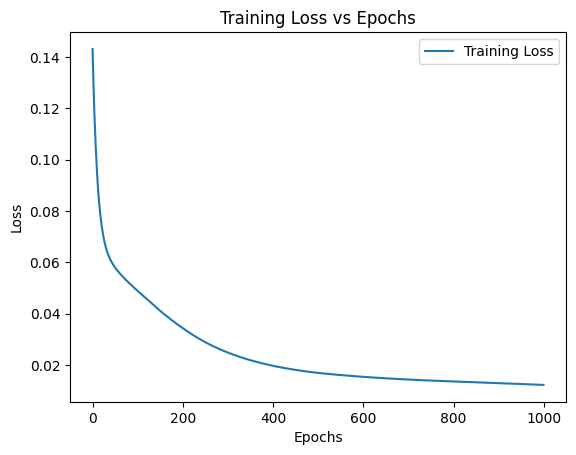

In [9]:
# Plotting the training loss curve
plt.plot(range(epochs), losses, label="Training Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Epochs')
plt.legend()
plt.show()

###  Actual vs Predicted
- Generate predictions and compare them to true outputs.
- Plot both to visualize model performance.


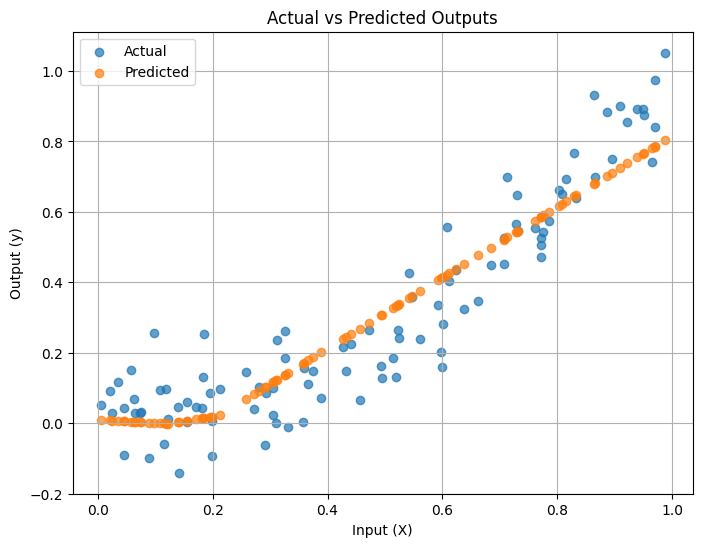

In [10]:
# Generate predictions
y_pred = forward(X_train)

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(X_train.numpy(), y_train.numpy(), label='Actual', alpha=0.7)
plt.scatter(X_train.numpy(), y_pred.numpy(), label='Predicted', alpha=0.7)
plt.xlabel("Input (X)")
plt.ylabel("Output (y)")
plt.title("Actual vs Predicted Outputs")
plt.legend()
plt.grid(True)
plt.show()


###  4D Visualization
- Visualize input, actual, and predicted values in 3D.
- Color encodes prediction error, providing deeper insight into model accuracy.


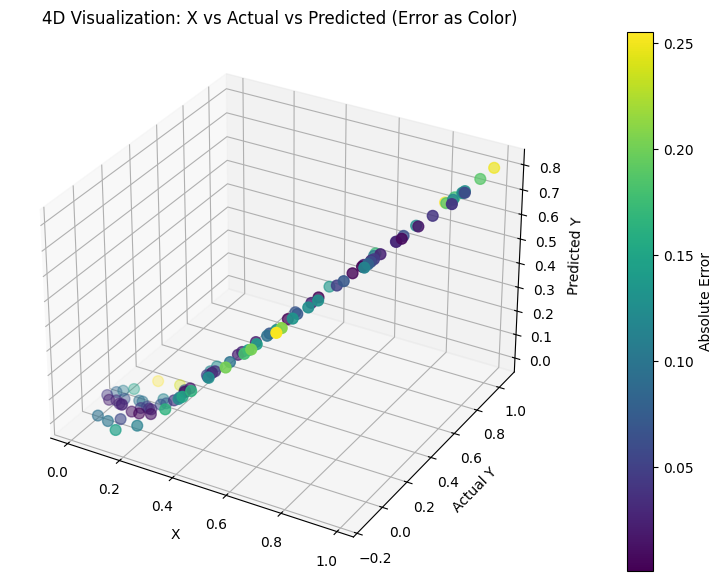

In [14]:
# Compute absolute error
errors = tf.abs(y_pred - y_train).numpy().flatten()

# 4D Plot: X vs y_true vs y_pred, color = error
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Input (X), actual (y), predicted (y_hat)
x_vals = X_train.numpy().flatten()
y_true = y_train.numpy().flatten()
y_hat = y_pred.numpy().flatten()

sc = ax.scatter(x_vals, y_true, y_hat, c=errors, cmap='viridis', s=60)
ax.set_xlabel("X")
ax.set_ylabel("Actual Y")
ax.set_zlabel("Predicted Y")
ax.set_title("4D Visualization: X vs Actual vs Predicted (Error as Color)")

cbar = fig.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label("Absolute Error")


plt.show()
